### pred to greyscale methods

In [7]:
from myutils.CLIPSeg import segment
from myutils.loaders import get_img
from myutils.processors import toGreyscale, toBinary

Text(0.5, 1.0, 'Histogram Comparison')

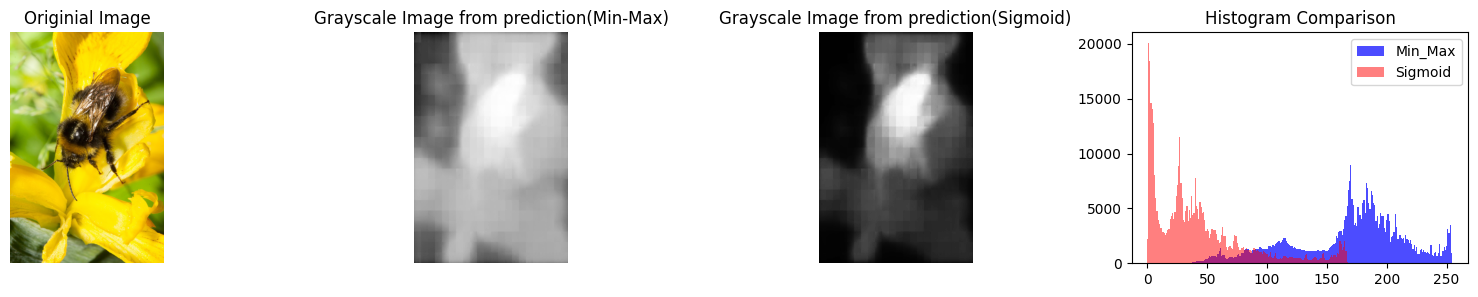

In [15]:
# First Get a prediction
img_id = 325

ori = get_img(id=img_id)
pred = segment(ori, prompts=["bee", "background"])
gt = get_img(id=img_id, path="./dataset/masks/gt/")

gs_minmax = toGreyscale(pred[0], method=1)
gs_sigmoid = toGreyscale(pred[0], method=2)

# Comparision
import numpy as np
import matplotlib.pyplot as plt


bins = np.arange(256)
val_range = (0, 255)

hist1, bins1 = np.histogram(gs_minmax.flatten(), bins=256, range=[0, 256])
hist2, bins2 = np.histogram(gs_sigmoid.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

axs[0].imshow(ori)
axs[0].axis("off")
axs[0].set_title("Originial Image")

axs[1].imshow(gs_minmax, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Grayscale Image from prediction(Min-Max)")

axs[2].imshow(gs_sigmoid, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Grayscale Image from prediction(Sigmoid)")

width = bins1[1] - bins1[0]
axs[3].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
axs[3].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[3].legend(loc="upper right")
axs[3].set_title("Histogram Comparison")

Text(0.5, 1.0, 'Histogram Comparison')

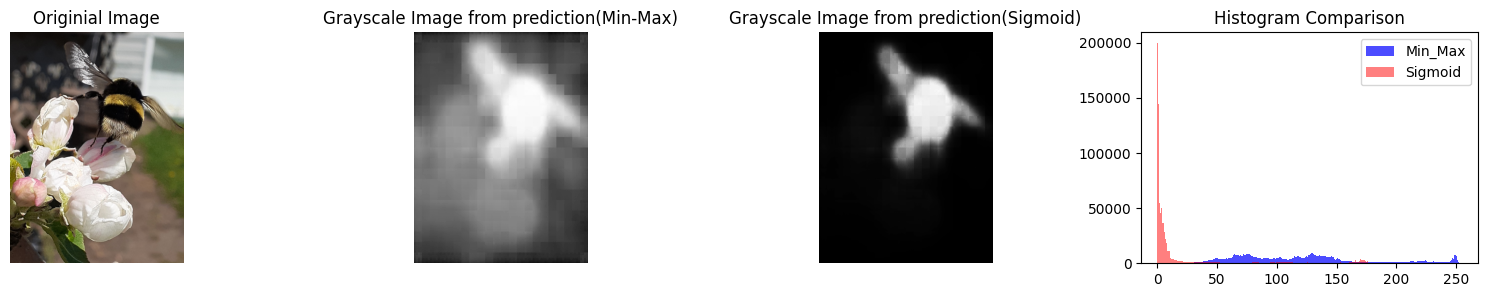

In [5]:
# First Get a prediction
img_id = 170

ori = get_img_by_id(img_id)
pred = seg_clipseg(ori, prompts=["bee", "background"])
gt = get_img_by_id(img_id, "./dataset/masks/gt/")

gs_minmax = toGreyscale(pred[0], method=1)
gs_sigmoid = toGreyscale(pred[0], method=2)

# Comparision
import numpy as np
import matplotlib.pyplot as plt


bins = np.arange(256)
val_range = (0, 255)

hist1, bins1 = np.histogram(gs_minmax.flatten(), bins=256, range=[0, 256])
hist2, bins2 = np.histogram(gs_sigmoid.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

axs[0].imshow(ori)
axs[0].axis("off")
axs[0].set_title("Originial Image")

axs[1].imshow(gs_minmax, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Grayscale Image from prediction(Min-Max)")

axs[2].imshow(gs_sigmoid, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Grayscale Image from prediction(Sigmoid)")

width = bins1[1] - bins1[0]
axs[3].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
axs[3].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[3].legend(loc="upper right")
axs[3].set_title("Histogram Comparison")

Threshold: 149.0


C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1701552509.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


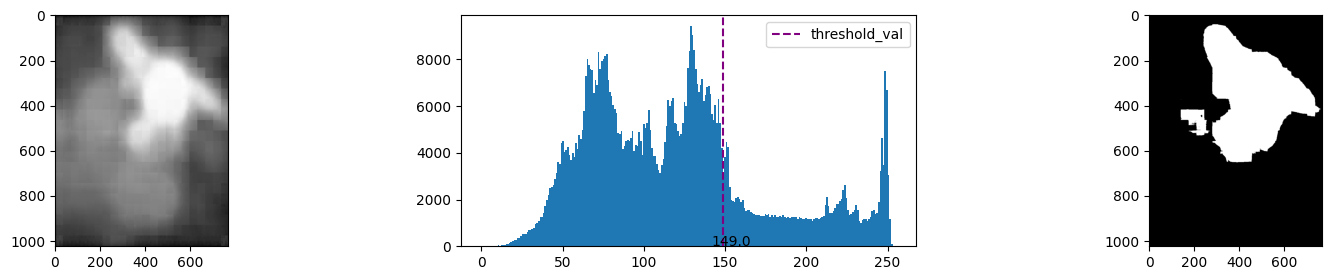

In [33]:
thr, bi_img = toBinary(gs_minmax, mode=2)

print("Threshold: {}".format(thr))

plt.subplots(figsize=(20, 3))
plt.subplot(131)
plt.imshow(gs_minmax, cmap="gray")
plt.subplot(132)
plt.axvline(x=thr, color="purple", linestyle="--", label="threshold_val")
plt.legend(loc="upper right")
plt.text(thr + 5, plt.ylim()[1] * 0.95, str(thr), color="black", ha="center")
plt.hist(gs_minmax.flatten(), bins=256, range=(0, 255))
plt.subplot(133)
plt.imshow(bi_img, cmap="gray")
plt.show()

Threshold: 68.0


C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1396668340.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


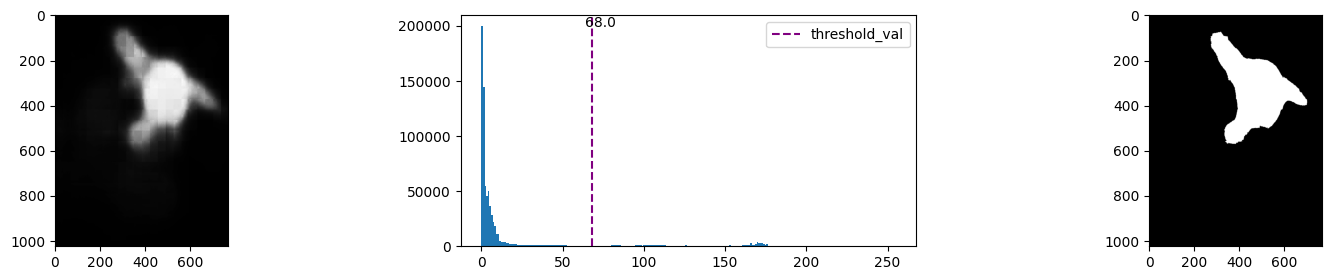

In [34]:
thr, bi_img = toBinary(gs_sigmoid, mode=2)

print("Threshold: {}".format(thr))

plt.subplots(figsize=(20, 3))
plt.subplot(131)
plt.imshow(gs_sigmoid, cmap="gray")
plt.subplot(132)
plt.hist(gs_sigmoid.flatten(), bins=256, range=(0, 255))
plt.axvline(x=thr, color="purple", linestyle="--", label="threshold_val")
plt.legend(loc="upper right")
plt.text(thr + 5, plt.ylim()[1] * 0.95, str(thr), color="black", ha="center")
plt.subplot(133)
plt.imshow(bi_img, cmap="gray")
plt.show()

### Greyscale to Binary

C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1790684520.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4,i+1)


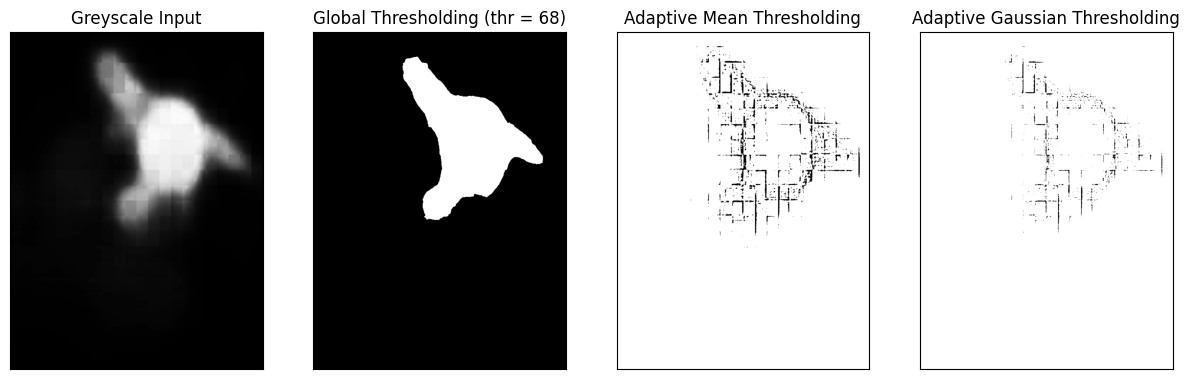

In [134]:
import cv2 as cv

img = gs_sigmoid.numpy().astype(np.uint8)

img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 68, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
titles = [
    "Greyscale Input",
    "Global Thresholding (thr = 68)",
    "Adaptive Mean Thresholding",
    "Adaptive Gaussian Thresholding",
]
images = [img, th1, th2, th3]
plt.subplots(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Get Score

#### Get Best threshold for IOU

In [38]:
import numpy as np
import torch

# import torchvision.transforms as transforms
from torchmetrics.classification import BinaryJaccardIndex, BinaryAveragePrecision

# import pandas as pd
import matplotlib.pyplot as plt

from myutils import CLIPSeg, DSS
from myutils.processors import toBinary, toGreyscale, toTensor
from myutils.loaders import get_img
from myutils.score import getBestIOU

# # Load ground truth
# PREDS_PATH = "./dataset/preds/"
GT_PATH = "./dataset/masks/gt/"
# RESULTS_PATH = "./results/"

# # Torch metrics
metric_biJ = BinaryJaccardIndex()
metric_biAP = BinaryAveragePrecision()
chosen_img_id = 170
test_img = get_img(id=chosen_img_id)
preds_clipseg = CLIPSeg.segment(test_img)
preds_dss = DSS.segment(test_img)
gt = get_img(id=chosen_img_id, path=GT_PATH)

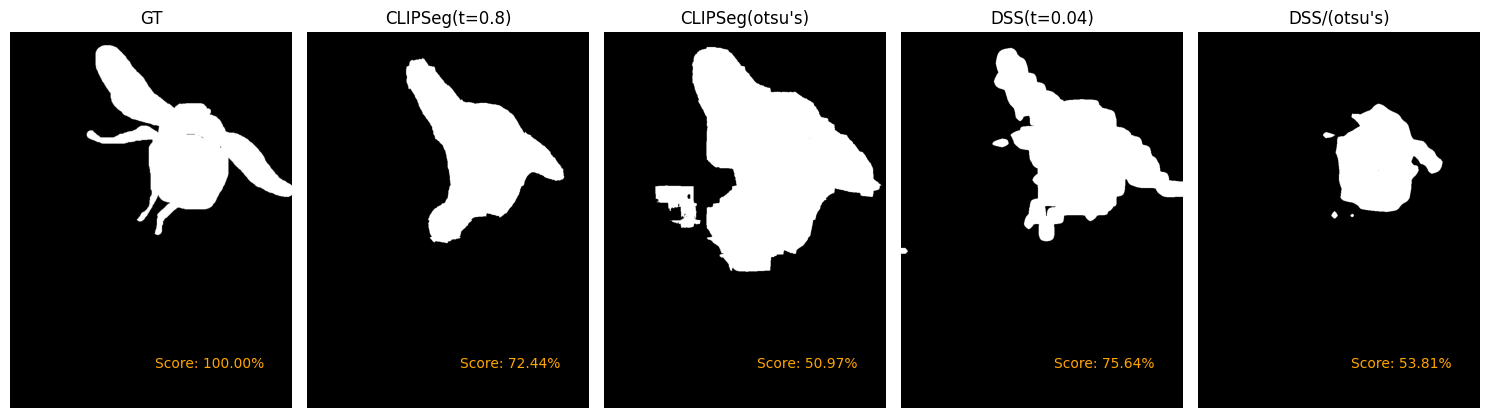

In [39]:
t_clipseg, score_clipseg = getBestIOU(preds_clipseg[0], toTensor(gt, True))
t_dss, score_dss = getBestIOU(preds_dss[0], toTensor(gt, True))
# print("Best threshold value: ", t, " with IOU score: ", score)
segmap_clipseg = toBinary(toGreyscale(preds_clipseg[0]), t_clipseg)
segmap_dss = toBinary(toGreyscale(preds_dss[0]), t_dss)

segmap_clipseg_otsu = toBinary(toGreyscale(preds_clipseg[0]), mode=2)[1]
segmap_dss_otsu = toBinary(toGreyscale(preds_dss[0]), mode=2)[1]

score_clipseg_otsu = metric_biJ(segmap_clipseg_otsu, toTensor(gt, True)).item() * 100
score_dss_otsu = metric_biJ(segmap_dss_otsu, toTensor(gt, True)).item() * 100

# Visualize the results

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

titles = ["GT", f"CLIPSeg(t={t_clipseg})", "CLIPSeg(otsu's)", f"DSS(t={t_dss})", "DSS/(otsu's)"]
scores = [100, score_clipseg, score_clipseg_otsu, score_dss, score_dss_otsu]

for i, ax in enumerate(axs):
    ax.imshow([gt, segmap_clipseg, segmap_clipseg_otsu, segmap_dss, segmap_dss_otsu][i], cmap="gray")
    ax.set_title(titles[i])
    ax.text(
        0.9,
        0.1,
        f"Score: {scores[i]:.2f}%",
        transform=ax.transAxes,
        horizontalalignment="right",
        verticalalignment="bottom",
        color="orange",
    )
    ax.axis("off")

plt.tight_layout()
plt.show()

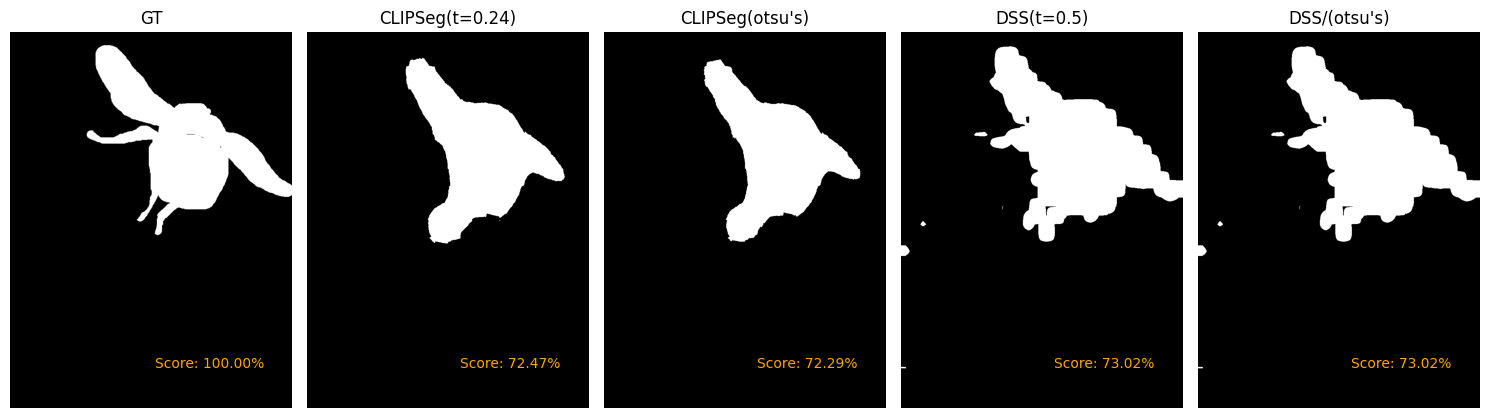

In [40]:
t_clipseg, score_clipseg = getBestIOU(preds_clipseg[0], toTensor(gt, True), 2)
t_dss, score_dss = getBestIOU(preds_dss[0], toTensor(gt, True), 2)
# print("Best threshold value: ", t, " with IOU score: ", score)
segmap_clipseg = toBinary(toGreyscale(preds_clipseg[0], 2), t_clipseg)
segmap_dss = toBinary(toGreyscale(preds_dss[0], 2), t_dss)

segmap_clipseg_otsu = toBinary(toGreyscale(preds_clipseg[0], 2), mode=2)[1]
segmap_dss_otsu = toBinary(toGreyscale(preds_dss[0], 2), mode=2)[1]

score_clipseg_otsu = metric_biJ(segmap_clipseg_otsu, toTensor(gt, True)).item() * 100
score_dss_otsu = metric_biJ(segmap_dss_otsu, toTensor(gt, True)).item() * 100

# Visualize the results

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

titles = ["GT", f"CLIPSeg(t={t_clipseg})", "CLIPSeg(otsu's)", f"DSS(t={t_dss})", "DSS/(otsu's)"]
scores = [100, score_clipseg, score_clipseg_otsu, score_dss, score_dss_otsu]

for i, ax in enumerate(axs):
    ax.imshow([gt, segmap_clipseg, segmap_clipseg_otsu, segmap_dss, segmap_dss_otsu][i], cmap="gray")
    ax.set_title(titles[i])
    ax.text(
        0.9,
        0.1,
        f"Score: {scores[i]:.2f}%",
        transform=ax.transAxes,
        horizontalalignment="right",
        verticalalignment="bottom",
        color="orange",
    )
    ax.axis("off")

plt.tight_layout()
plt.show()

In [43]:
score, t = getBestIOU(preds_clipseg[0], toTensor(gt, True))

print(f"Best threshold value: {t}, with IOU score: {score}")
# print("Best threshold value: ", t, " with IOU score: ", score)

Best threshold value: 72.4391758441925, with IOU score: 0.8


### get best prediction prompt

In [44]:
from myutils.processors import toBinary, toGreyscale
from myutils.DSS import segment
from myutils.loaders import get_img
import matplotlib.pyplot as plt
import torch
from torchmetrics.classification import BinaryJaccardIndex
import numpy as np


metric_biJ = BinaryJaccardIndex()

gt = torch.from_numpy(np.array(get_img(id=200, path="./dataset/masks/gt/").convert("1"))).long()
preds = segment(get_img(200))

In [5]:
from myutils.score import getBestIOU, getBestIOUfromPreds, getMeanIOU, getBestIOUfromPreds

# preds = segment(get_img_by_id(100, "./dataset/WildBees/"))

result = getBestIOU(id=324, pred_id=1)

print(result)

(0.36, 74.62316751480103)


In [46]:
from myutils.DSS import segment
from myutils.loaders import get_img
from myutils.processors import toGreyscale, toBinary

pred = get_img(200, path="./dataset/preds/clipseg/0/", format="pt")
pred_gs = toGreyscale(pred)
pred_bi = toBinary(pred_gs)

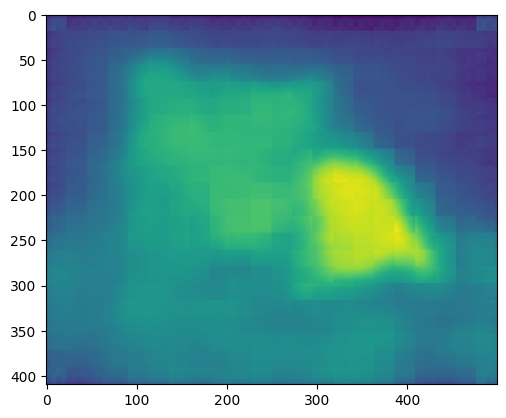

In [50]:
import matplotlib.pyplot as plt

plt.imshow(pred)

In [61]:
from myutils.DSS import segment
from myutils.loaders import get_img

preds = segment(get_img(200))
gt = torch.from_numpy(np.array(get_img(id=200, path="./dataset/masks/gt/").convert("1"))).long()

result = getBestIOUfromPreds(preds, gt)

print(f"Best prompt's idx={result[0]}, with threshold={result[1][0]}, iou score={result[1][1]:.2f}%")

Best prompt's idx=0, with threshold=0.22, iou score=78.64%


#### Get Mean IOU

In [2]:
from myutils.score import getMeanIOU

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


In [3]:
miou, duration = getMeanIOU(model=2, t=0.36)
print(f"MIOU={miou:.2f}%, takes {duration:.2f}s in total, {(duration/726):.2f}s per image.")

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:10<05:18,  2.22it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [07:28<00:00,  1.62it/s]

MIOU=71.35573110607973, takes 448.37192487716675s in total, 0.6175921830264005s per image.


In [3]:
getMeanIOU(model=2)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


66.42354950075939

In [1]:
# Get Best Mean IOU
from myutils.score import getBestMeanIOU

thr, score = getBestMeanIOU(model=2)
print(f"Best threshold={thr} with score={score:.2f}%.")

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:10<05:05,  2.32it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  86%|███████████████████████████████     | 626/726 [09:11<01:34,  1.06it/s]

#### Save DSS's scores to csv 

In [1]:
from myutils.score import saveCSV


saveCSV(0.36)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Saving iou scores to file...:   2%|▊                               | 18/726 [00:10<05:16,  2.24it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Saving iou scores to file...: 100%|███████████████████████████████| 726/726 [07:52<00:00,  1.54it/s]
